<a href="https://colab.research.google.com/github/jasmitha8/The-Sparks-Foundation-Internship_Aug-2021/blob/main/Task1_UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Jasmitha PN
DATA SCIENCE & BUSINESS ANALYTICS INTERN (Aug 2021)



TASK-1 
Prediction using Unsupervised ML
From the given 'Iris' dataset, predict optimum number of clusters by performing exploratory data analysis

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Load the iris dataset
iris = pd.read_csv("/content/Iris.csv")
iris.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
print(f"Number of classes = \n{iris.Species.value_counts()}")

Number of classes = 
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


#1. Data Visualisation

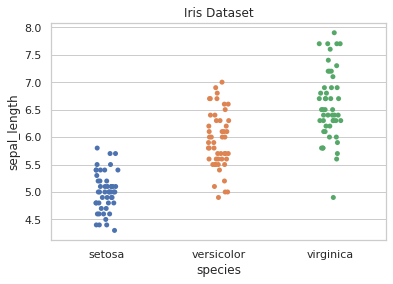

In [6]:
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x ='species',y = 'sepal_length',data = iris);
plt.title('Iris Dataset')
plt.show()

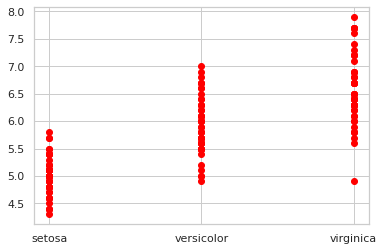

In [18]:
plt.scatter(iris['species'],iris['sepal_length'], color = 'red')

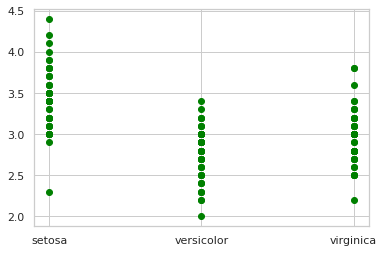

In [16]:
plt.scatter(iris['species'],iris['sepal_width'], color="green")

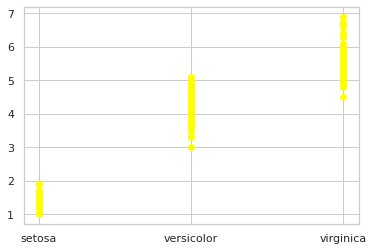

In [17]:
plt.scatter(iris['species'],iris['petal_length'], color="yellow")

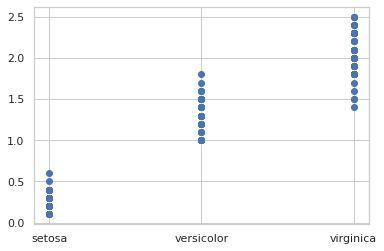

In [13]:
plt.scatter(iris['species'],iris['petal_width'])

# 2. k-means clustering

**Finding number of clusters**
Using the elbow method to find the optimum number of k
Finding the sum of squared errors for each clusters and plotting these values against k and the point in the curve that resembled elbow yields the optimum value for k

In [26]:
x = iris.iloc[:, [0, 1, 2, 3]].values


SSE = []

for i in range(1, 11):
    k = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    k.fit(x)
    SSE.append(k.inertia_)

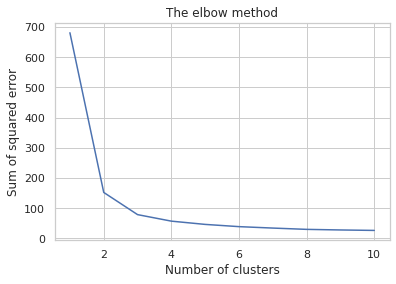

In [27]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), SSE)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error') 
plt.show()

Initialising clusters

In [30]:
# Assigning all the data to a cluster 0, 1, 2
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [35]:
iris['cluster'] = y_kmeans
print(iris.head())
print("\n")
print(iris.tail())

   sepal_length  sepal_width  petal_length  petal_width species  cluster
0           5.1          3.5           1.4          0.2  setosa        1
1           4.9          3.0           1.4          0.2  setosa        1
2           4.7          3.2           1.3          0.2  setosa        1
3           4.6          3.1           1.5          0.2  setosa        1
4           5.0          3.6           1.4          0.2  setosa        1


     sepal_length  sepal_width  petal_length  petal_width    species  cluster
145           6.7          3.0           5.2          2.3  virginica        0
146           6.3          2.5           5.0          1.9  virginica        2
147           6.5          3.0           5.2          2.0  virginica        0
148           6.2          3.4           5.4          2.3  virginica        0
149           5.9          3.0           5.1          1.8  virginica        2


Visualisation of clusters

In [45]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

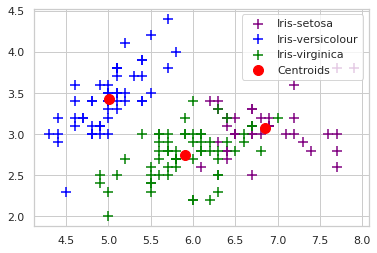

In [55]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'purple', marker='+', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', marker='+', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', marker='+', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()